In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [146]:
data=pd.read_csv('cost_revenue_dirty.csv')
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [147]:
data.shape

(5391, 6)

In [148]:
data.isna().values.any()

False

In [149]:
# checking for duplicate
data.duplicated().values.any()

False

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [151]:
# removing "," and "$"  from USD_Production_Budget, USD_worldwide_Gross, USD_Domestic_Gross
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
for col in columns_to_clean:
    for char in chars_to_remove:
        # replace each character in the chars_to_remove list amd replace with an empty strings
        data[col] =data[col].astype(str).str.replace(char, "")
     # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [152]:
data.Release_Date =pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [153]:
#  average production budget of the films in the data set
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


In [154]:
data[data.USD_Production_Budget== 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [155]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [156]:
# no worldwide revenue with the highest production budget
data[data.USD_Worldwide_Gross ==0].max()

Rank                                            5390
Release_Date                     2020-12-31 00:00:00
Movie_Title              Zombies of Mass Destruction
USD_Production_Budget                      175000000
USD_Worldwide_Gross                                0
USD_Domestic_Gross                                 0
dtype: object

In [157]:
# movies with zero domestic revenue
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'////////////////////{len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

////////////////////512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [158]:
# zero worldwide revenue
zero_worldwide = data[data.USD_Domestic_Gross == 0]
# number of movies with the a zero worldwide revenue
print(f'||||||||||||||||{len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

||||||||||||||||512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [159]:

# filtering movies base on: worldwide revenue not equals to zero and domestic is equal to zero
international_releases =data.loc[(data.USD_Worldwide_Gross !=0) &
                                  (data.USD_Domestic_Gross ==0)]
print(f"!!!!!!!!!!!!!!!!{len(international_releases)}")
international_releases


!!!!!!!!!!!!!!!!155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [160]:
# using the pandas function to acoomplist the same thing as above
internal_release = data.query(' USD_Domestic_Gross ==0 and USD_Worldwide_Gross != 0 ') #USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0
internal_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [161]:
# removing films that were not released yet as of the time of data collection (May 1st, 2018).
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data[data.Release_Date > scrape_date]
print(f'||||||||||||||{len(future_releases)}')
future_releases
data_clean = data.drop(future_releases.index)


||||||||||||||7


In [162]:
# lossind movies, movies that had production budget greater that worldwide gross
lossing_movies =data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
lossing_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


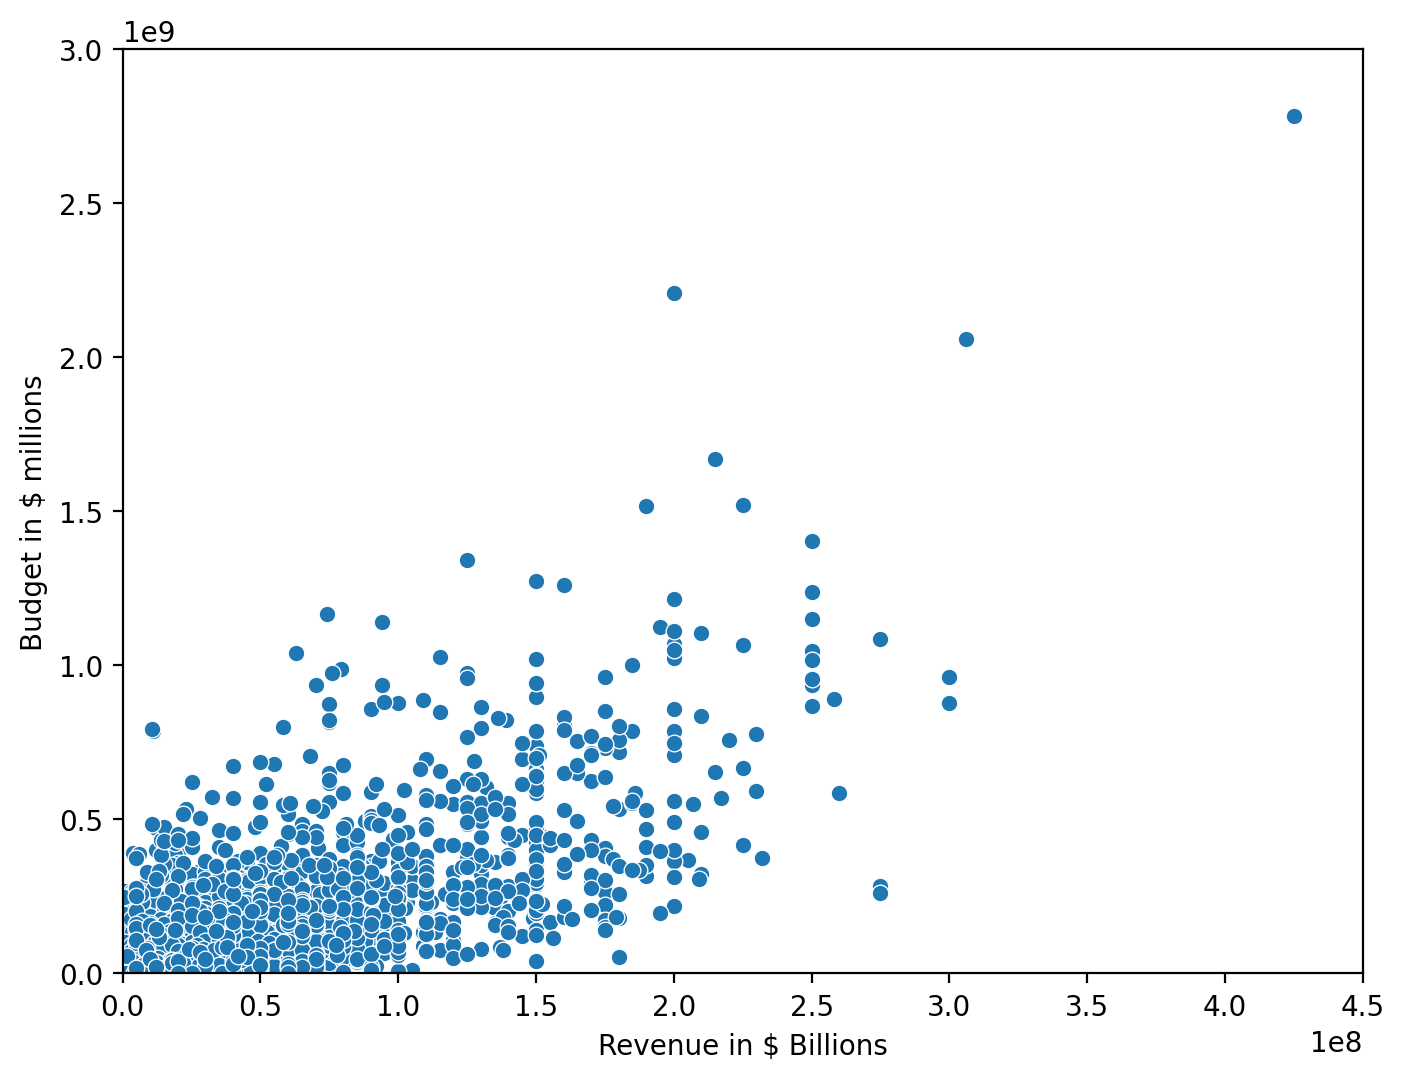

In [163]:
# using seaborn to plot scatterplot
plt.figure(figsize=(8,6), dpi =200)
ax=sns.scatterplot(data= data_clean,
               x = 'USD_Production_Budget',
               y = 'USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      xlabel= ('Revenue in $ Billions'),
      ylabel= ('Budget in $ millions')
      )
plt.show()

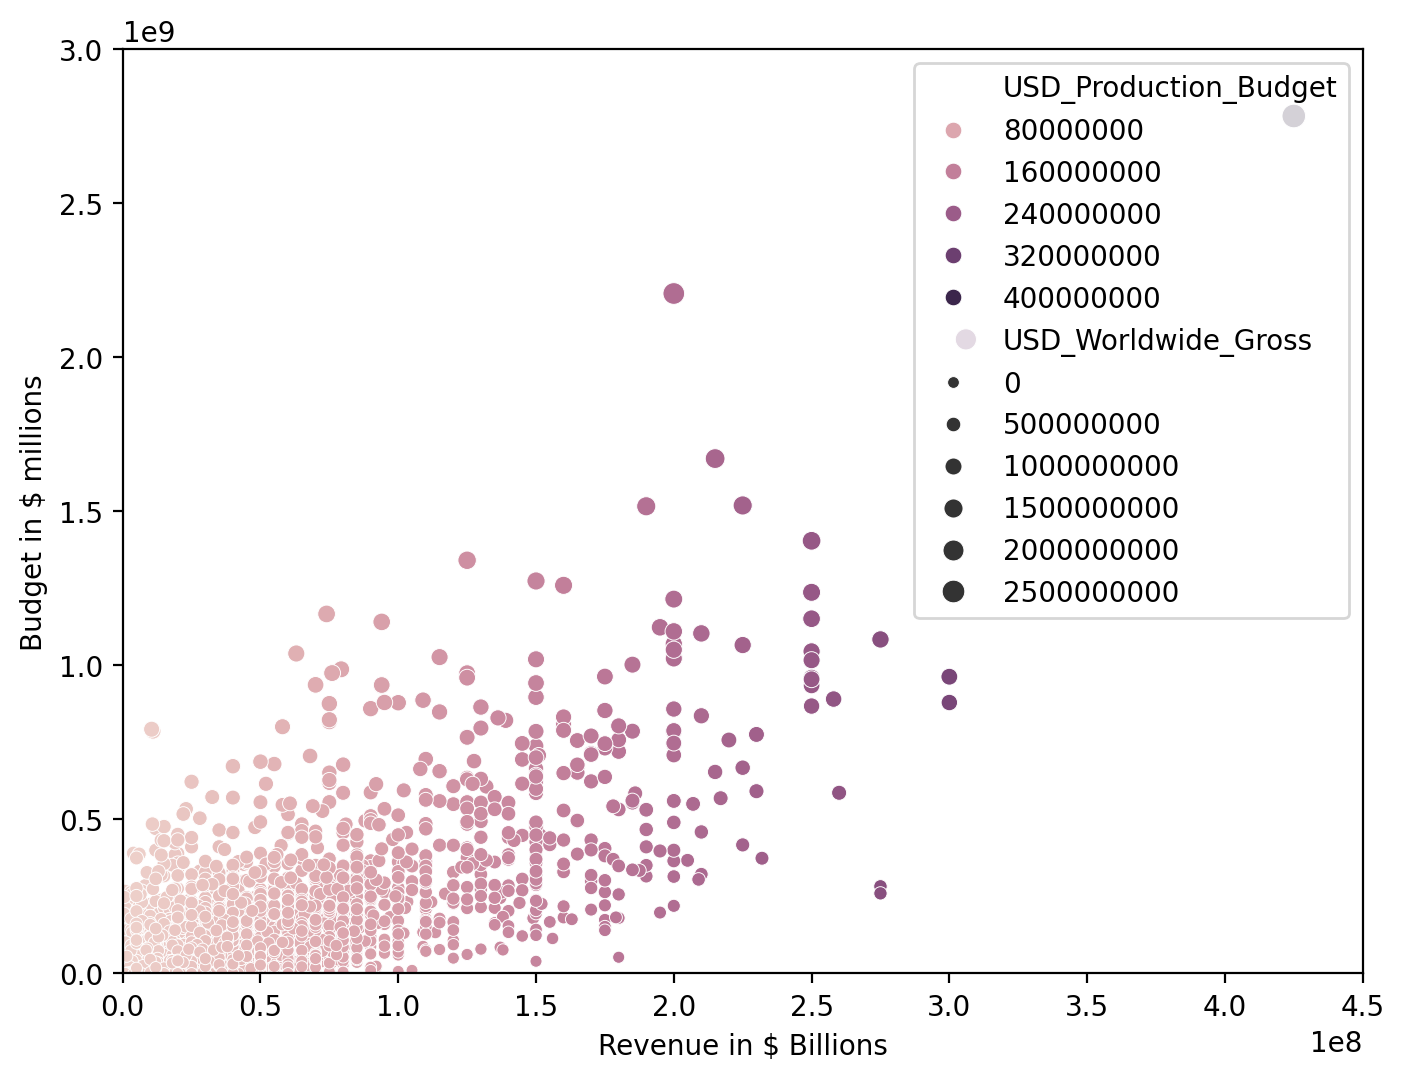

In [164]:
# creating buble chart
plt.figure(figsize=(8,6), dpi =200)
ax=sns.scatterplot(data= data_clean,
               x = 'USD_Production_Budget',
               y = 'USD_Worldwide_Gross',
                hue='USD_Production_Budget',
                size ='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      xlabel= ('Revenue in $ Billions'),
      ylabel= ('Budget in $ millions')
      )
plt.show()

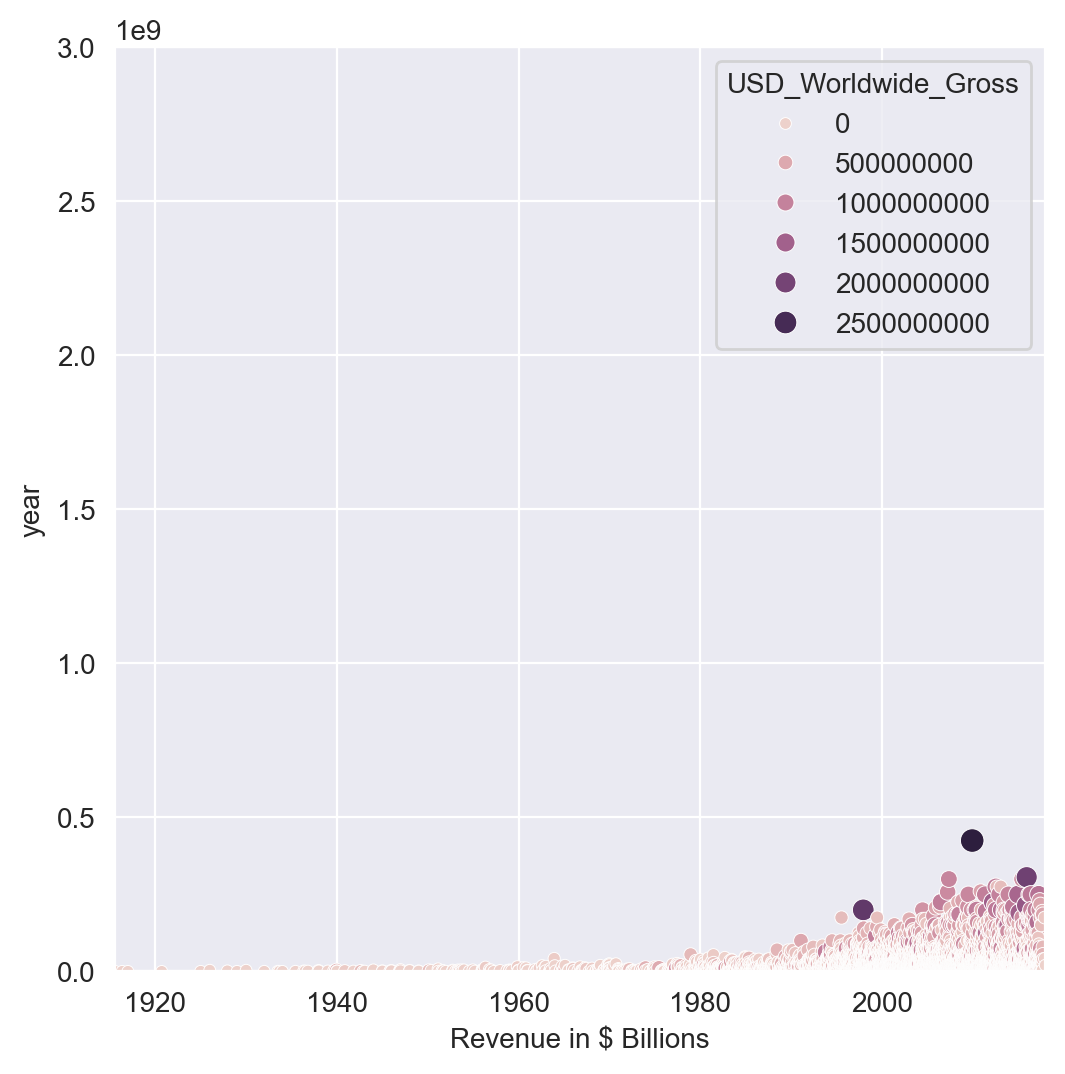

In [165]:
plt.figure(figsize=(6,6), dpi =200)
with sns.axes_style('darkgrid'):
    ax=sns.scatterplot(data= data_clean,
                   x = 'Release_Date',
                   y = 'USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size ='USD_Worldwide_Gross')
    ax.set(ylim=(0, 3000000000),
          xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
          xlabel= ('Revenue in $ Billions'),
          ylabel= ('year')
          )
    plt.show()

In [166]:
# converting years to decade
dt_index =pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decade= (years//10)*10
print(decade)
data_clean['Decade']= decade
data_clean['Decade']

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)


0       1910
1       1910
2       1910
3       1920
4       1920
        ... 
5379    2010
5380    2010
5381    2010
5382    2010
5383    2010
Name: Decade, Length: 5384, dtype: int32

In [167]:
# seperating films btw 1980 
old_films = data_clean[data_clean.Decade <= 1980]
new_films = data_clean[data_clean.Decade > 1980]
new_films.count()

Rank                     4828
Release_Date             4828
Movie_Title              4828
USD_Production_Budget    4828
USD_Worldwide_Gross      4828
USD_Domestic_Gross       4828
Decade                   4828
dtype: int64

In [168]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,556.000000,556,5.560000e+02,5.560000e+02,5.560000e+02,556.00000
mean,3607.402878,1974-11-01 20:14:40.575539584,1.065752e+07,5.581190e+07,3.816624e+07,1969.55036
min,638.000000,1915-08-02 00:00:00,2.500000e+04,0.000000e+00,0.000000e+00,1910.00000
25%,2797.250000,1968-07-23 12:00:00,2.585000e+06,7.897000e+06,7.128126e+06,1960.00000
50%,3830.000000,1980-06-09 12:00:00,6.000000e+06,2.133918e+07,1.986950e+07,1980.00000
75%,4462.750000,1985-06-28 12:00:00,1.500000e+07,5.734193e+07,4.685000e+07,1980.00000
max,5356.000000,1989-12-31 00:00:00,7.000000e+07,7.929653e+08,4.609980e+08,1980.00000
std,1094.549276,NaN,1.136366e+07,9.592349e+07,5.348772e+07,14.72802


In [169]:
old_films.sort_values('USD_Production_Budget', ascending = False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
506,638,1988-06-22,Who Framed Roger Rabbit?,70000000,351500000,154112492,1980
542,662,1989-09-08,The Abyss,70000000,54243125,54243125,1980
504,884,1988-05-25,Rambo III,58000000,188715611,53715611,1980
554,933,1989-12-22,Tango & Cash,55000000,63408614,63408614,1980
242,912,1978-12-15,Superman,55000000,300200000,134218018,1970
299,969,1981-06-19,Superman II,54000000,108185706,108185706,1980
398,1139,1984-12-14,The Cotton Club,48000000,25928721,25928721,1980
531,1124,1989-05-24,Indiana Jones and the Last Crusade,48000000,474171806,197171806,1980
342,1158,1982-09-17,Inchon,46000000,4408636,4408636,1980
399,1204,1984-12-14,Dune,45000000,27447471,27447471,1980


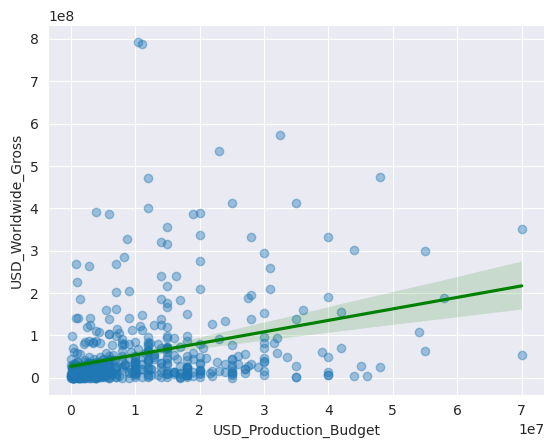

In [170]:
# using linear regression to visualise data
# plt.figure(figsize=(6,4), dpi =200)
with sns.axes_style('darkgrid'):
    sns.regplot(data= old_films,
               x ='USD_Production_Budget',
               y = 'USD_Worldwide_Gross',
               scatter_kws ={'alpha':0.4},
               line_kws ={'color': 'green'})

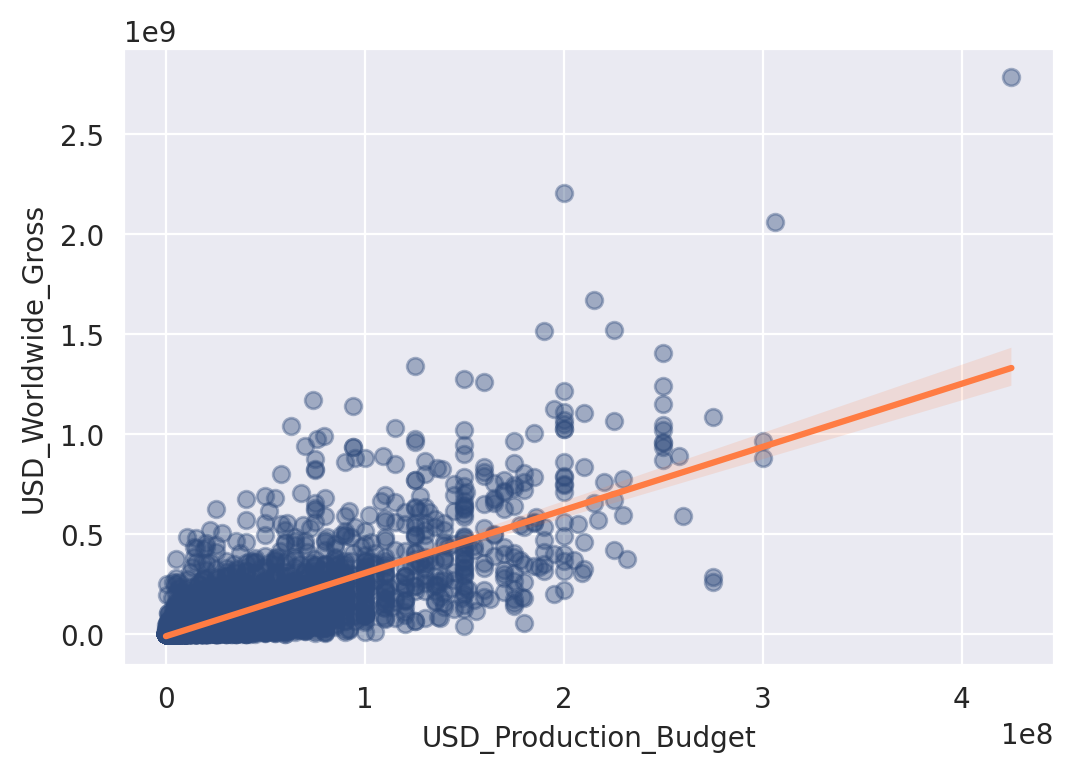

In [171]:
plt.figure(figsize=(6,4), dpi =200)
with sns.axes_style('darkgrid'):
    sns.regplot(data= new_films,
               x ='USD_Production_Budget',
               y = 'USD_Worldwide_Gross',
                color= '#2f4b7c',
               scatter_kws ={'alpha':0.4},
               line_kws ={'color': '#ff7c43'})
    ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

In [172]:
# using linear regrassion to build model for pridict what revenue a movie can get wrt to the productionbudget
regression =LinearRegression()
# Explanatory Variable(s) 
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [174]:
# theta zero
regression.intercept_

array([-12670836.94994287])

In [175]:
# theta one
regression.coef_

array([[3.15886176]])

In [176]:
# R-squared
regression.score(X, y)

0.5747816336645686

In [178]:
# Using the model to make a prediction
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350m film is around ${revenue_estimate:.10}.')


The estimated revenue for a $350m film is around $1.093e+09.
